In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('django-packages.csv', sep=';')

invalid_repo_url = df[~df['has_valid_repo_url']]
invalid_repo = df[(df['has_valid_repo_url']) & (~df['has_valid_repo'])]
valid_repo = df[(df['has_valid_repo_url']) & (df['has_valid_repo'])]
valid_github_repo = valid_repo[valid_repo['platform'] == 'github']
valid_gitlab_repo = valid_repo[valid_repo['platform'] == 'gitlab']

def get_pie_label(p, total):
    absolute = '{:.0f}'.format(p * total / 100)
    percentage = '{0:.0%}'.format(p/100.0)

    return '{} ({})'.format(absolute, percentage)

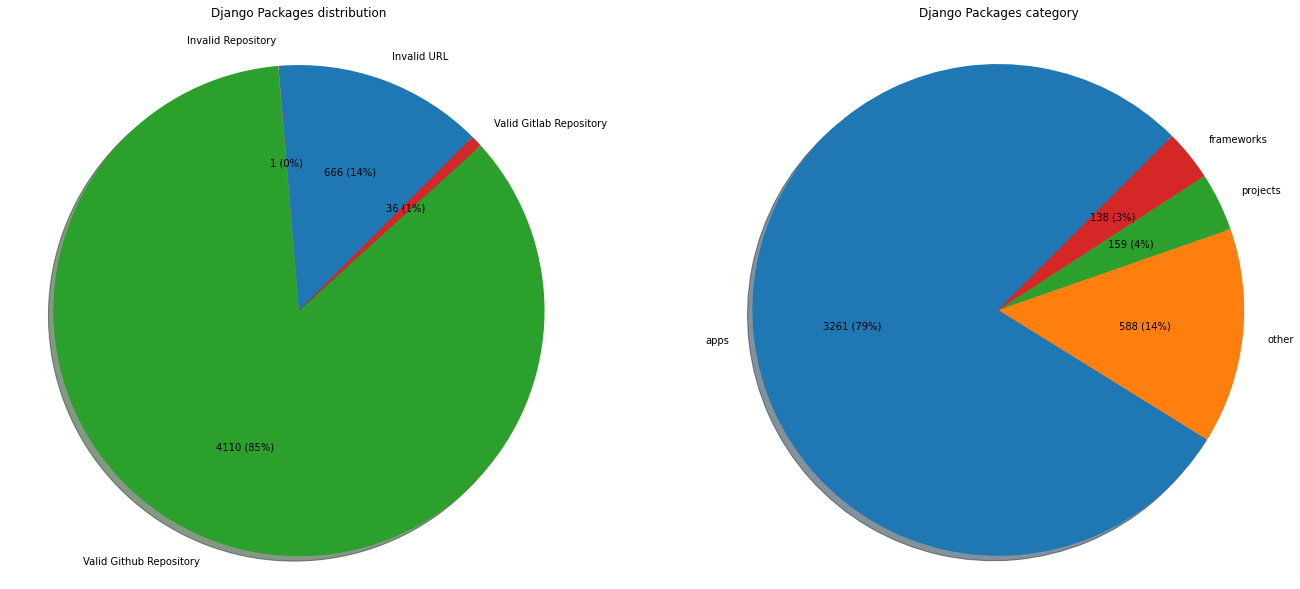

In [2]:
labels = 'Invalid URL', 'Invalid Repository', 'Valid Github Repository', 'Valid Gitlab Repository'

sizes = [
    len(invalid_repo_url), 
    len(invalid_repo), 
    len(valid_github_repo), 
    len(valid_gitlab_repo),
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 10))
fig.set_facecolor('white')

ax1.pie(sizes, labels=labels, autopct=lambda p: get_pie_label(p, len(df)),shadow=True, startangle=45)
ax1.set_title('Django Packages distribution\n')
ax1.axis('equal')

labels = 'apps', 'other', 'projects', 'frameworks'
sizes = [
    len(valid_repo[valid_repo['dp_category'] == labels[0]]),
    len(valid_repo[valid_repo['dp_category'] == labels[1]]),
    len(valid_repo[valid_repo['dp_category'] == labels[2]]),
    len(valid_repo[valid_repo['dp_category'] == labels[3]]),    
]

ax2.pie(sizes, labels=labels, autopct=lambda p: get_pie_label(p, len(valid_repo)), shadow=True, startangle=45)
ax2.axis('equal')
ax2.set_title('Django Packages category\n')

plt.show()

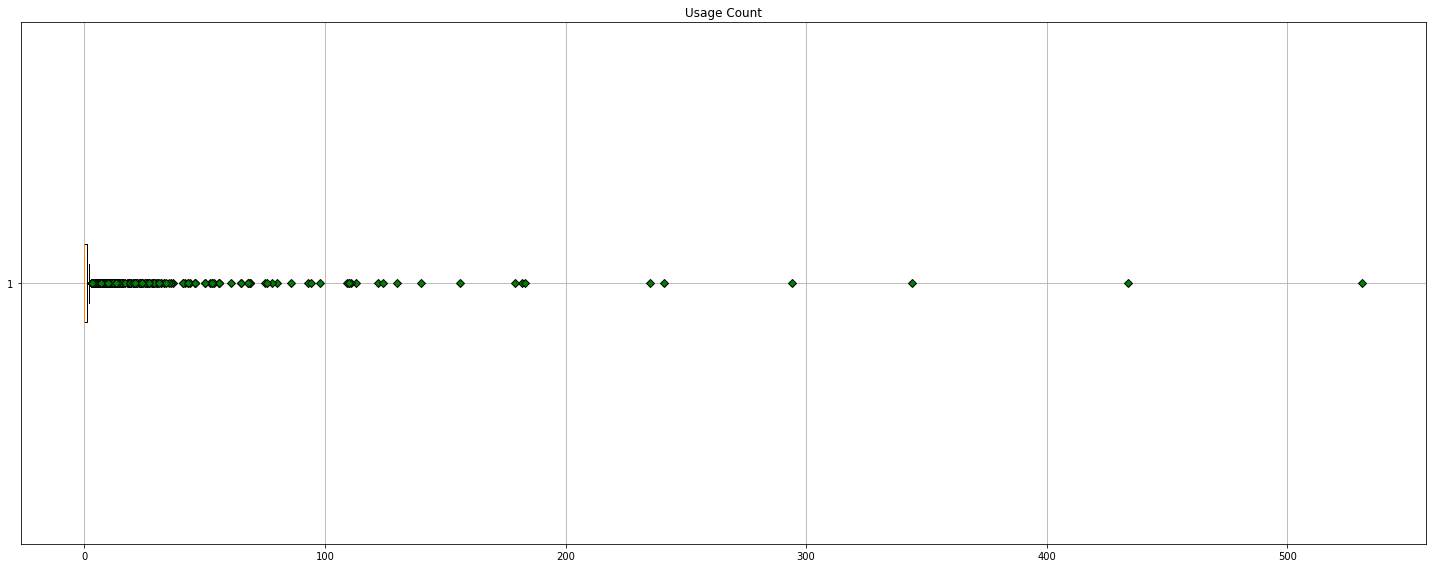

In [3]:
fig, ax = plt.subplots(figsize=(20, 8))

usage_count = valid_repo['dp_usage_count'].values

ax.boxplot(usage_count, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Usage Count')

plt.tight_layout()
plt.grid()

plt.show()

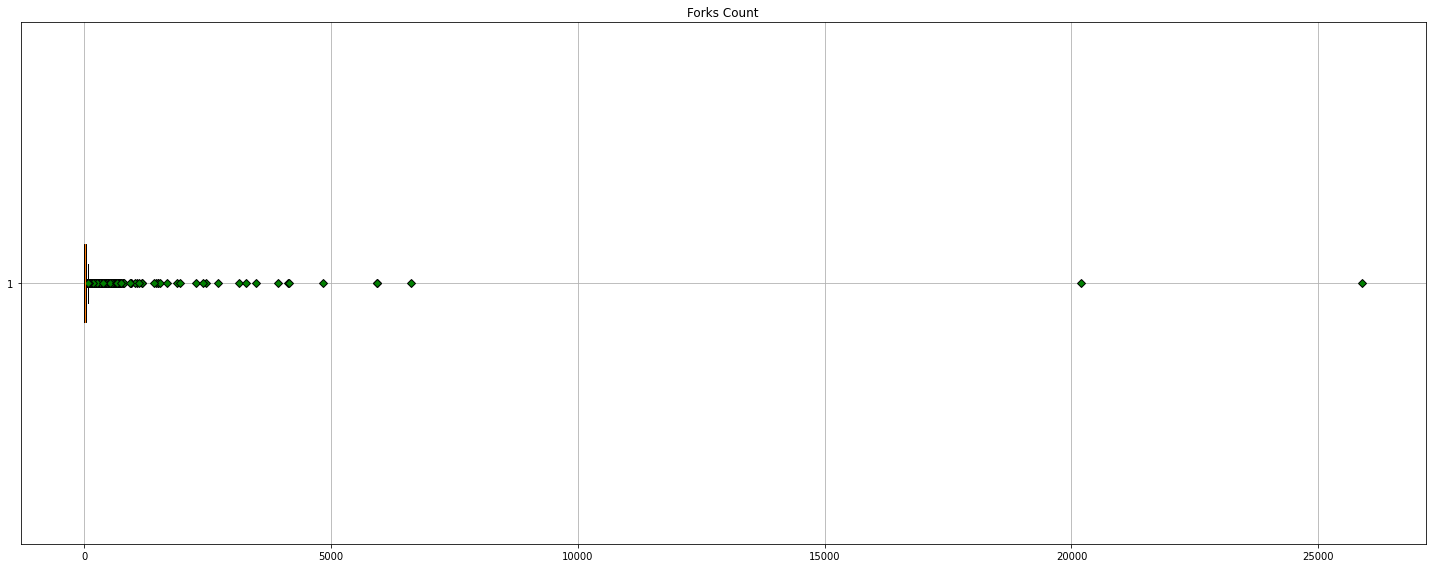

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_forks = valid_repo['repo_forks'].values

ax.boxplot(repo_forks, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Forks Count')

plt.tight_layout()
plt.grid()

plt.show()

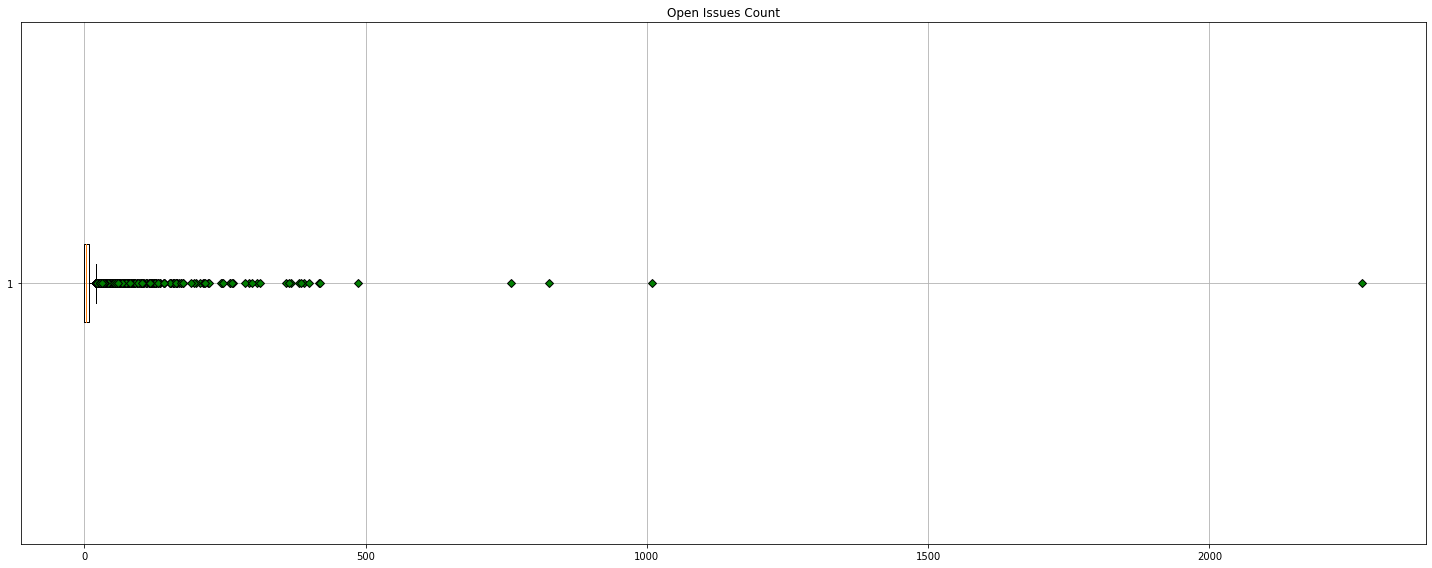

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))

open_issues = valid_repo['repo_open_issues'].values

ax.boxplot(open_issues, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Open Issues Count')

plt.tight_layout()
plt.grid()

plt.show()

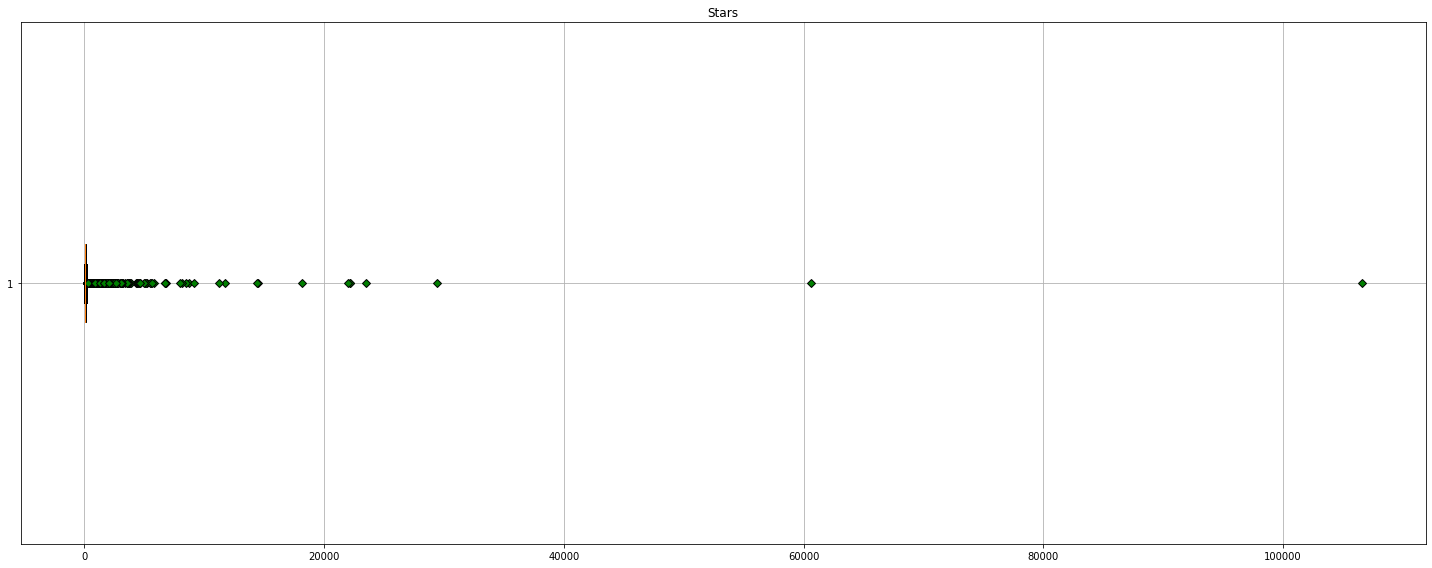

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_stars = valid_repo['repo_stars'].values

ax.boxplot(repo_stars, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Stars')

plt.tight_layout()
plt.grid()

plt.show()